In [9]:
df_1 = _dntk.execute_sql(
  'WITH daily_orders_by_item as (SELECT\n    l.item_id,\n    CAST(o.created_timestamp as DATE) AS ordered_ds,\n    COUNT(l.id) as item_qty\n FROM orders.csv o\n JOIN line_items.csv l\n ON o.id = l.order_id\nGROUP BY \nl.item_id,\nCAST(o.created_timestamp as DATE))\nSELECT \nordered_ds as ds,\nsum(item_qty) as y\nFROM daily_orders_by_item\nGROUP BY\nordered_ds\norder by ds\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_1

,ds,y
0,2024-03-02,5.0
1,2024-03-05,3.0
2,2024-03-06,5.0
3,2024-03-07,12.0
4,2024-03-08,2.0
...,...,...
835,2026-10-26,40.0
836,2026-10-27,44.0
837,2026-10-28,45.0
838,2026-10-29,44.0


In [10]:
_dntk.DeepnoteChart(df_1, """{"layer":[{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"ds","scale":{"type":"linear"},"timeUnit":"yearmonthdate","bandPosition":0},"y":{"axis":{"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"type":"quantitative","field":"y","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"type":"nominal","datum":"y","scale":{"range":["#2266D3"],"domain":["y"]}},"xOffset":{"datum":"series_0"}},"transform":[]}]}],"resolve":{"scale":{"color":"independent"}}}],"title":"","config":{"legend":{"disable":false}},"params":[{"name":"valueLabelsColor","value":"black"}],"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"seriesNames":["y"],"seriesOrder":[0],"specSchemaVersion":2,"tooltipDefaultMode":true}}""", attach_selection=True, filters='[]')

In [11]:
!pip install prophet==1.2.1


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
#Python
import pandas as pd
from prophet import Prophet


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/Themelih1/Data_Science_Projects/refs/heads/main/Sales-Forecasting-Prophet/Data/daily_orders_item_example.csv')

holidays = pd.DataFrame({
    'holiday': 'new_year',
    'ds': pd.to_datetime(['2026-01-01', '2026-12-01']),
    'lower_window': 0,
    'upper_window': 1
})
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

13:13:40 - cmdstanpy - INFO - Chain [1] start processing
13:13:40 - cmdstanpy - INFO - Chain [1] done processing


,ds
1200,2027-10-26
1201,2027-10-27
1202,2027-10-28
1203,2027-10-29
1204,2027-10-30


In [21]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1200,2027-10-26,58.185092,47.809151,68.546465
1201,2027-10-27,59.345252,48.296136,69.868029
1202,2027-10-28,60.180475,49.127423,70.572191
1203,2027-10-29,60.168441,49.078021,70.498207
1204,2027-10-30,52.651025,42.281050,62.824249


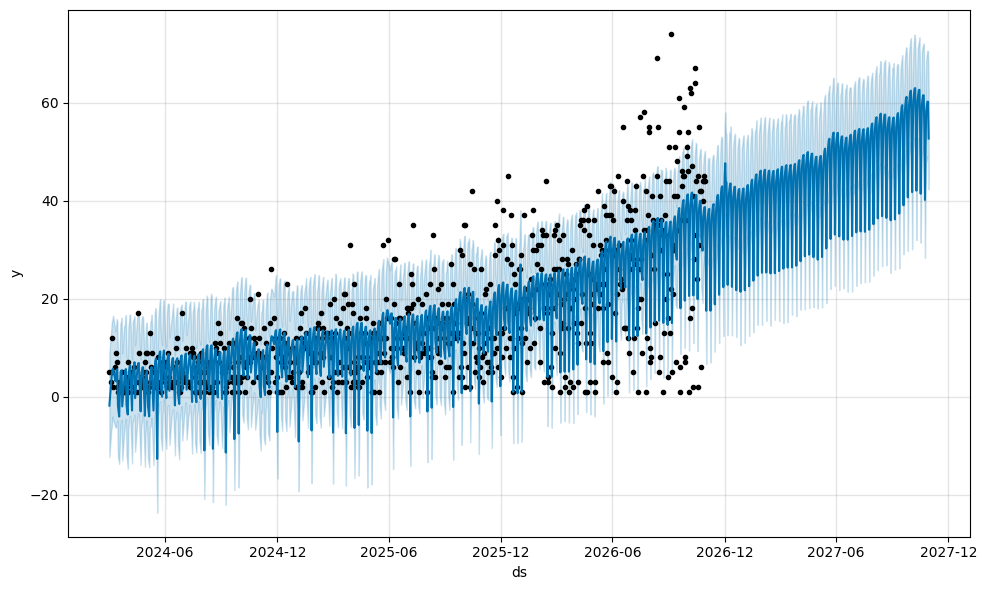

In [24]:
fig1 = m.plot(forecast)

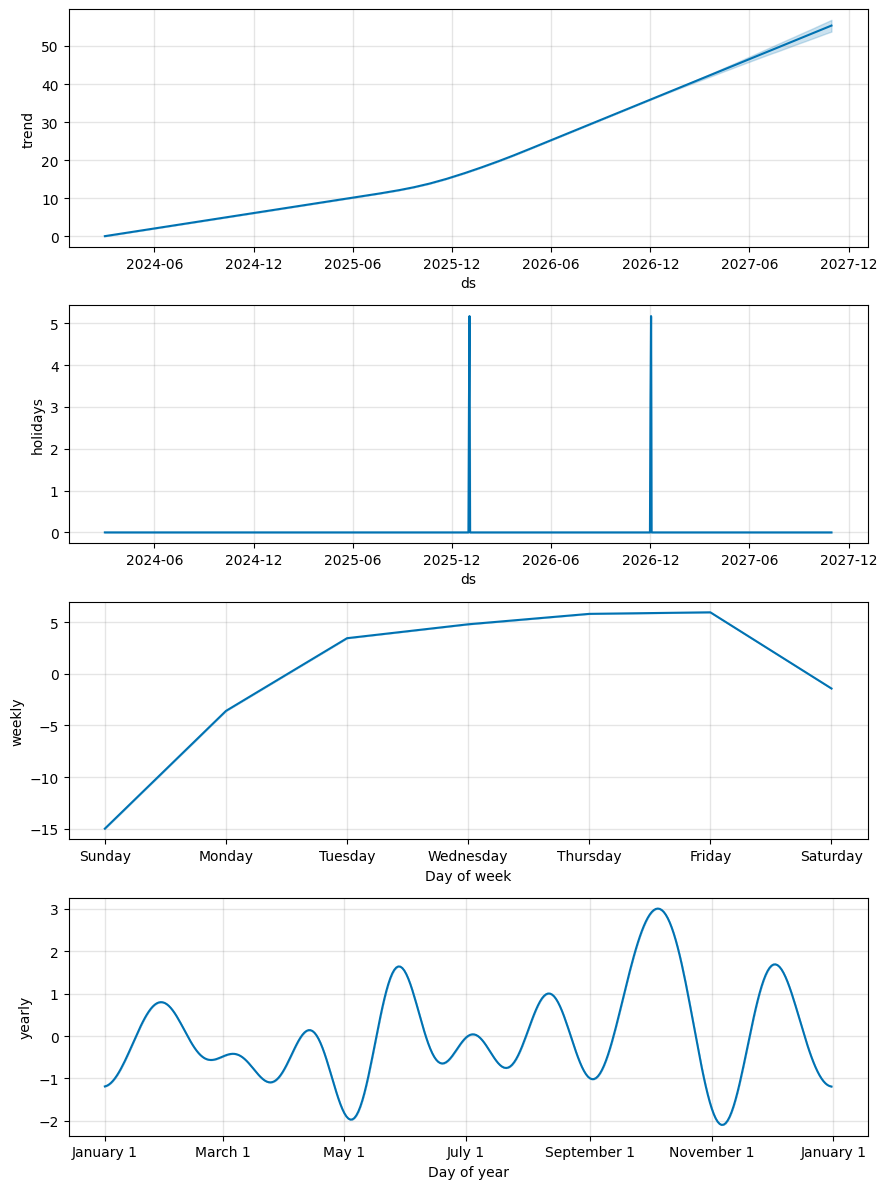

In [27]:
fig2 = m.plot_components(forecast)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a470a8b8-c542-4fab-b115-5071f3663ea4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>